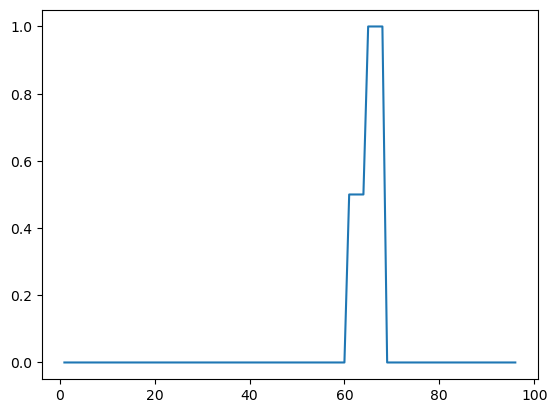

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

baseload = pd.read_csv('./data/Fluvius load profiles type 1 consumer/Type1consumerLoad3.csv', header=None)
# Rename columns to start numbering at 1
baseload.columns = range(1, baseload.shape[1] + 1)
# Adjust the index to start at 1
baseload.index = range(1, len(baseload) + 1)
baseload = baseload*0.25

chargingprofile = pd.read_csv('../yearly_charged_energy_profile.csv', header=None)
# Drop the first row and column (headers)
chargingprofile = chargingprofile.drop(index=0, columns=0).reset_index(drop=True)
# Adjust the index to start at 1
chargingprofile.index = range(1, len(chargingprofile) + 1)
def min_max_normalize(df):
    return (df - df.min()) / (df.max() - df.min())

# Apply normalization
chargingprofile= min_max_normalize(chargingprofile)

peakcharge = 1
base_and_EV = baseload + (peakcharge * chargingprofile)

plt.plot(chargingprofile[2])
plt.show()

Statistical moment 1: Mean

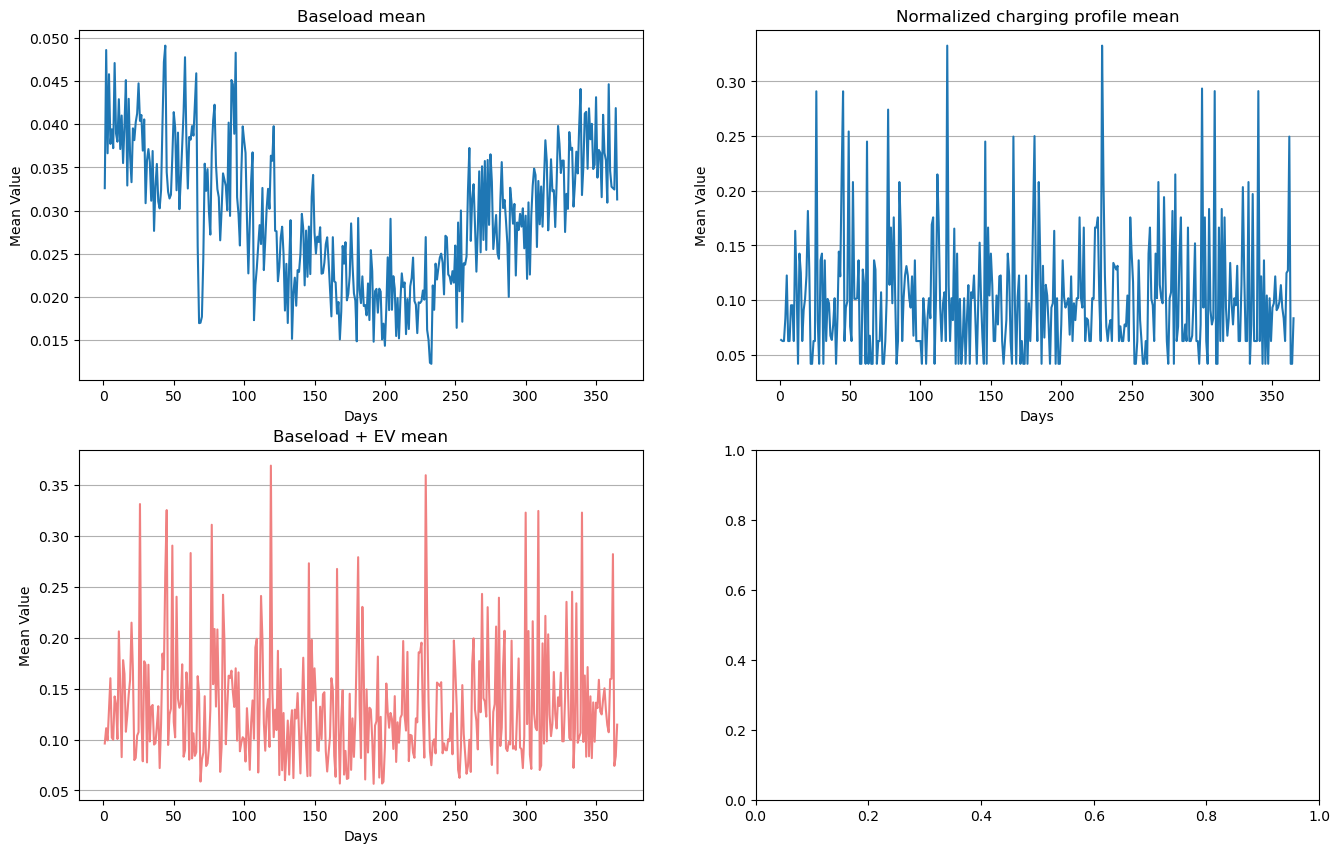

In [2]:
chargingprofile_mean_year = chargingprofile.mean(axis=0)
baseload_mean_year = baseload.mean(axis=0)
baseandEV_mean_year = base_and_EV.mean(axis=0)

fig, axs = plt.subplots(2, 2, figsize=(16, 10))  # 2 row, 2 columns
axs[0,0].plot(baseload_mean_year.index, baseload_mean_year)
axs[0,0].set_title('Baseload mean')
axs[0,0].set_xlabel('Days')
axs[0,0].set_ylabel('Mean Value')
axs[0,0].grid(axis='y')

axs[0,1].plot(chargingprofile_mean_year.index, chargingprofile_mean_year)
axs[0,1].set_title('Normalized charging profile mean')
axs[0,1].set_xlabel('Days')
axs[0,1].set_ylabel('Mean Value')
axs[0,1].grid(axis='y')

axs[1,0].plot(baseandEV_mean_year.index, baseandEV_mean_year, color='lightcoral')
axs[1,0].set_title('Baseload + EV mean')
axs[1,0].set_xlabel('Days')
axs[1,0].set_ylabel('Mean Value')
axs[1,0].grid(axis='y')

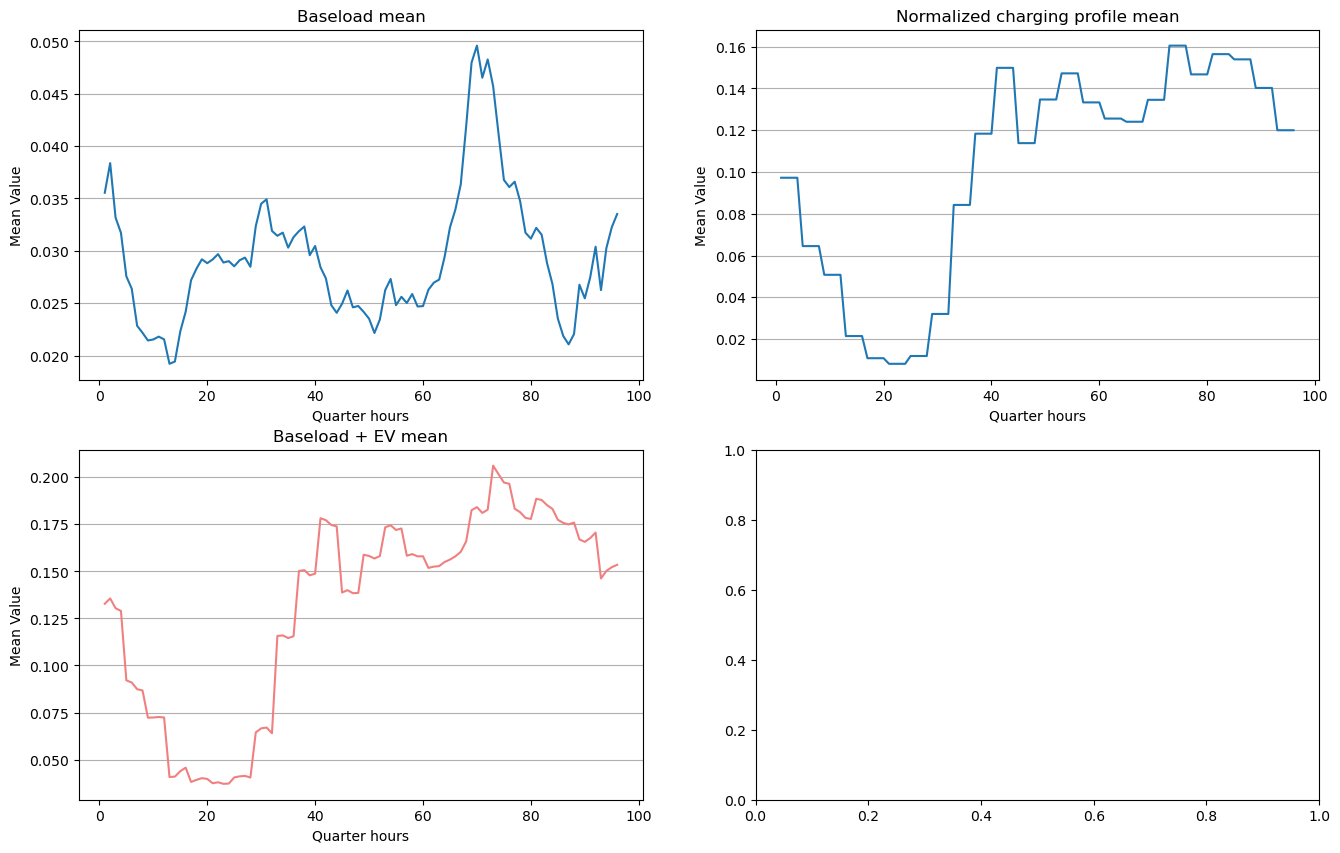

In [3]:
baseload_mean_day = baseload.mean(axis=1)
chargingprofile_mean_day = chargingprofile.mean(axis=1)
baseandEV_mean_day = base_and_EV.mean(axis=1)

fig, axs = plt.subplots(2, 2, figsize=(16, 10))  # 2 row, 2 columns
axs[0,0].plot(baseload_mean_day.index, baseload_mean_day)
axs[0,0].set_title('Baseload mean')
axs[0,0].set_xlabel('Quarter hours')
axs[0,0].set_ylabel('Mean Value')
axs[0,0].grid(axis='y')

axs[0,1].plot(chargingprofile_mean_day.index, chargingprofile_mean_day)
axs[0,1].set_title('Normalized charging profile mean')
axs[0,1].set_xlabel('Quarter hours')
axs[0,1].set_ylabel('Mean Value')
axs[0,1].grid(axis='y')

axs[1,0].plot(baseandEV_mean_day.index, baseandEV_mean_day, color='lightcoral')
axs[1,0].set_title('Baseload + EV mean')
axs[1,0].set_xlabel('Quarter hours')
axs[1,0].set_ylabel('Mean Value')
axs[1,0].grid(axis='y')

Charger kW sensitivity

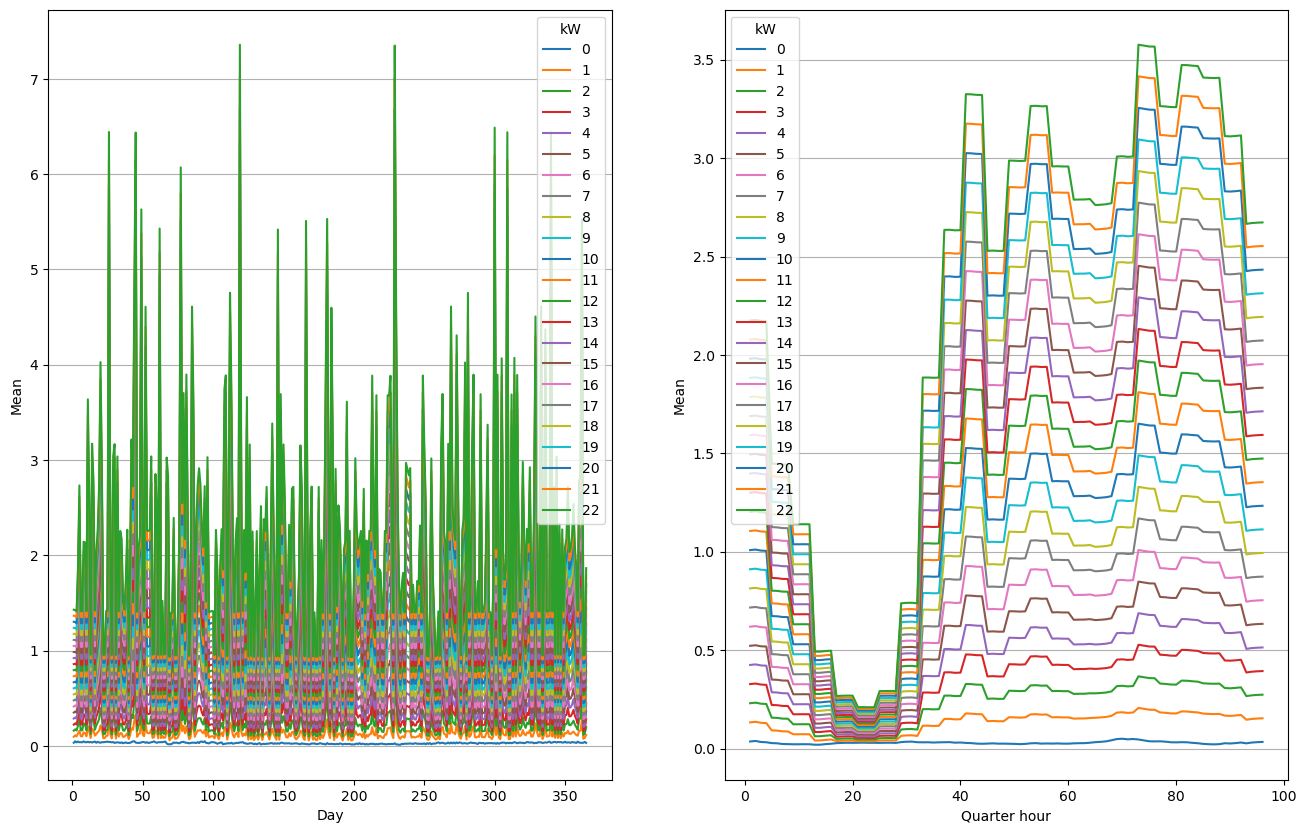

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [4]:
kw_values = np.arange(0, 23, 1) 
results_year = pd.DataFrame()
results_day = pd.DataFrame()

# Calculate the net consumption and mean for each kWp value
for kw in kw_values: 
    net_consumption = baseload + (kw * chargingprofile)

    net_consumption_year_mean = net_consumption.mean(axis=0)
    net_consumption_day_mean = net_consumption.mean(axis=1)
    
    results_year[len(results_year.columns)] = net_consumption_year_mean
    results_day[len(results_day.columns)] = net_consumption_day_mean

fig, axs = plt.subplots(1, 2, figsize=(16, 10))
plt.figure(figsize=(10, 6))
for kw in results_year.columns:
    axs[0].plot(results_year.index, results_year[kw], label=kw)
axs[0].set_xlabel('Day')
axs[0].set_ylabel('Mean')
axs[0].legend(title='kW')
axs[0].grid(axis='y')

plt.figure(figsize=(10, 6))
for kw in results_day.columns:
    axs[1].plot(results_day.index, results_day[kw], label=kw)
axs[1].set_xlabel('Quarter hour')
axs[1].set_ylabel('Mean')
axs[1].legend(title='kW') 
axs[1].grid(axis='y')

plt.show()

Statistical moment 2: Variance

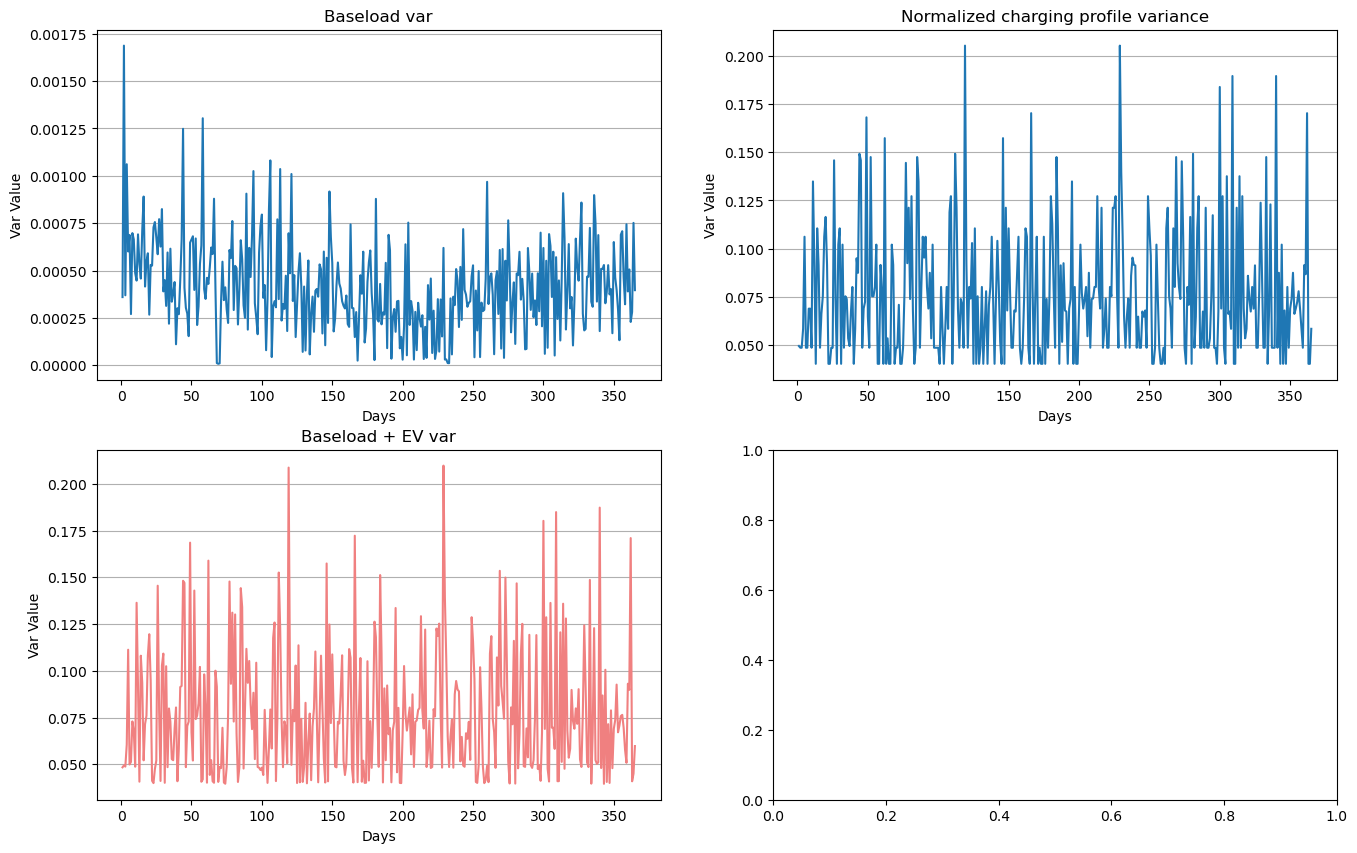

In [5]:
chargingprofile_var_year = chargingprofile.var(axis=0)
baseload_var_year = baseload.var(axis=0)
baseandEV_var_year = base_and_EV.var(axis=0)

fig, axs = plt.subplots(2, 2, figsize=(16, 10))  # 2 row, 2 columns
axs[0,0].plot(baseload_var_year.index, baseload_var_year)
axs[0,0].set_title('Baseload var')
axs[0,0].set_xlabel('Days')
axs[0,0].set_ylabel('Var Value')
axs[0,0].grid(axis='y')

axs[0,1].plot(chargingprofile_var_year.index, chargingprofile_var_year)
axs[0,1].set_title('Normalized charging profile variance')
axs[0,1].set_xlabel('Days')
axs[0,1].set_ylabel('Var Value')
axs[0,1].grid(axis='y')

axs[1,0].plot(baseandEV_var_year.index, baseandEV_var_year, color='lightcoral')
axs[1,0].set_title('Baseload + EV var')
axs[1,0].set_xlabel('Days')
axs[1,0].set_ylabel('Var Value')
axs[1,0].grid(axis='y')

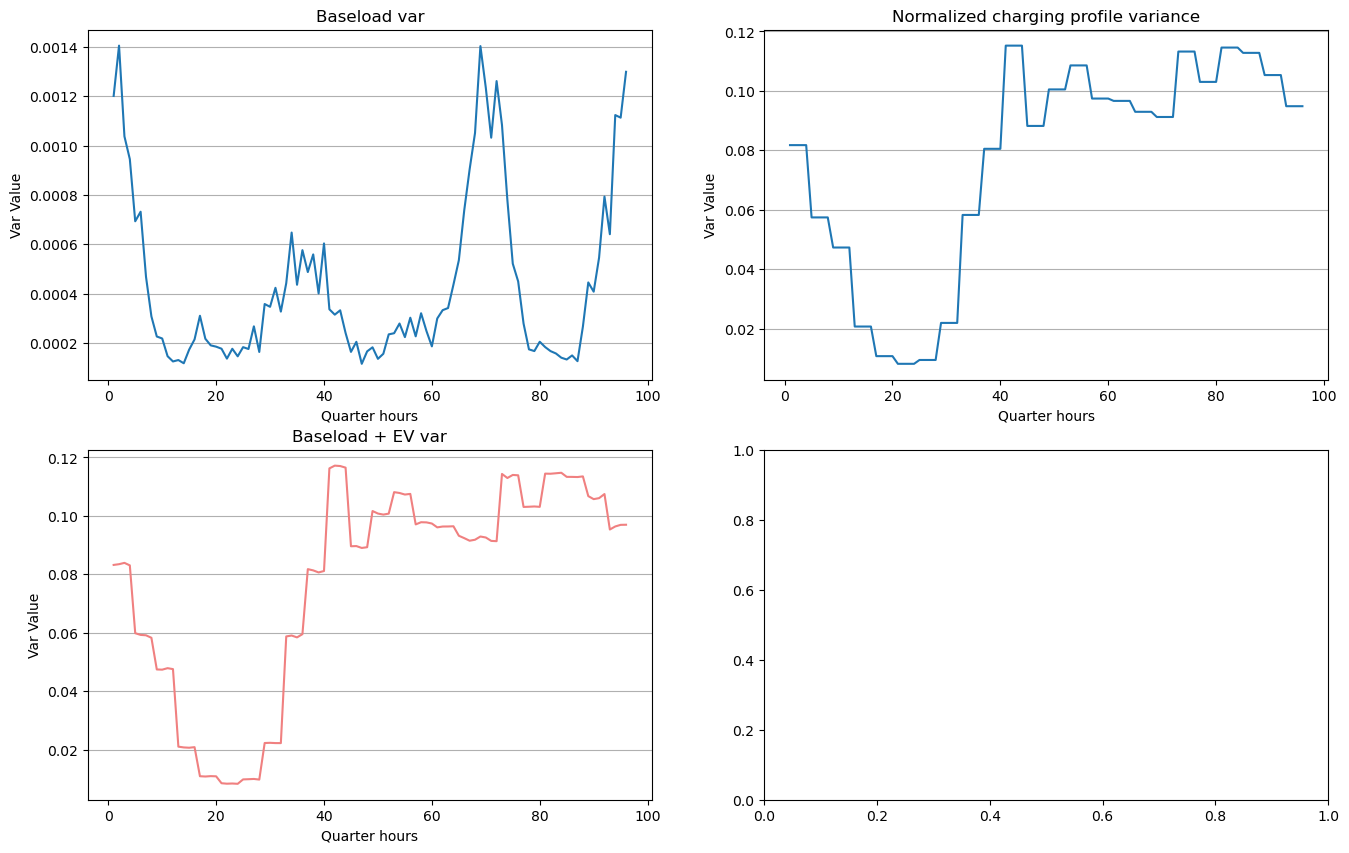

In [6]:
baseload_var_day = baseload.var(axis=1)
chargingprofile_var_day = chargingprofile.var(axis=1)
baseandEV_var_day = base_and_EV.var(axis=1)

fig, axs = plt.subplots(2, 2, figsize=(16, 10))  # 2 row, 2 columns
axs[0,0].plot(baseload_var_day.index, baseload_var_day)
axs[0,0].set_title('Baseload var')
axs[0,0].set_xlabel('Quarter hours')
axs[0,0].set_ylabel('Var Value')
axs[0,0].grid(axis='y')

axs[0,1].plot(chargingprofile_var_day.index, chargingprofile_var_day)
axs[0,1].set_title('Normalized charging profile variance')
axs[0,1].set_xlabel('Quarter hours')
axs[0,1].set_ylabel('Var Value')
axs[0,1].grid(axis='y')

axs[1,0].plot(baseandEV_var_day.index, baseandEV_var_day, color='lightcoral')
axs[1,0].set_title('Baseload + EV var')
axs[1,0].set_xlabel('Quarter hours')
axs[1,0].set_ylabel('Var Value')
axs[1,0].grid(axis='y')

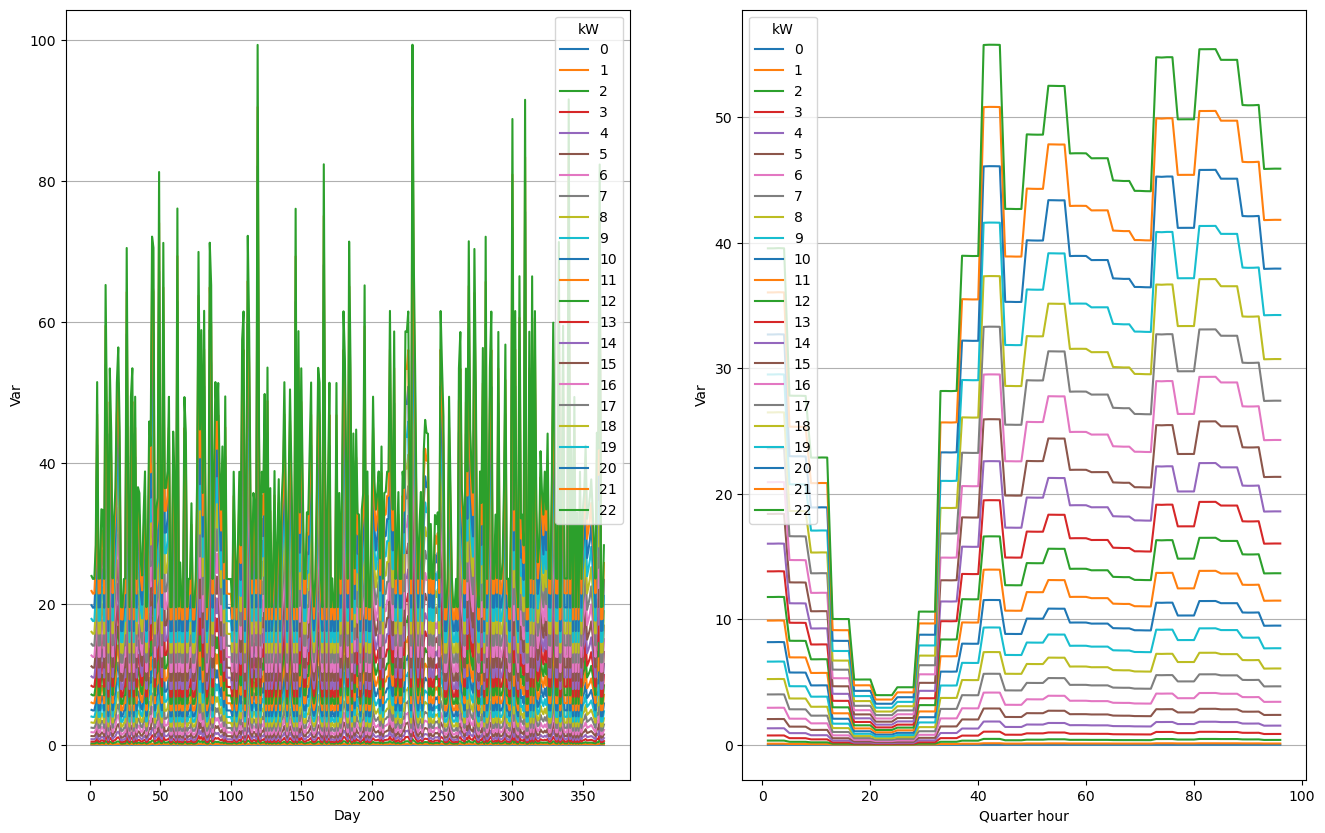

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [7]:
kw_values = np.arange(0, 23, 1) 
results_year = pd.DataFrame()
results_day = pd.DataFrame()

# Calculate the net consumption and var for each kWp value
for kw in kw_values: 
    net_consumption = baseload + (kw * chargingprofile)

    net_consumption_year_var = net_consumption.var(axis=0)
    net_consumption_day_var = net_consumption.var(axis=1)
    
    results_year[len(results_year.columns)] = net_consumption_year_var
    results_day[len(results_day.columns)] = net_consumption_day_var

fig, axs = plt.subplots(1, 2, figsize=(16, 10))
plt.figure(figsize=(10, 6))
for kw in results_year.columns:
    axs[0].plot(results_year.index, results_year[kw], label=kw)
axs[0].set_xlabel('Day')
axs[0].set_ylabel('Var')
axs[0].legend(title='kW')
axs[0].grid(axis='y')

plt.figure(figsize=(10, 6))
for kw in results_day.columns:
    axs[1].plot(results_day.index, results_day[kw], label=kw)
axs[1].set_xlabel('Quarter hour')
axs[1].set_ylabel('Var')
axs[1].legend(title='kW') 
axs[1].grid(axis='y')

plt.show()

Statistical moment 3: Skewness

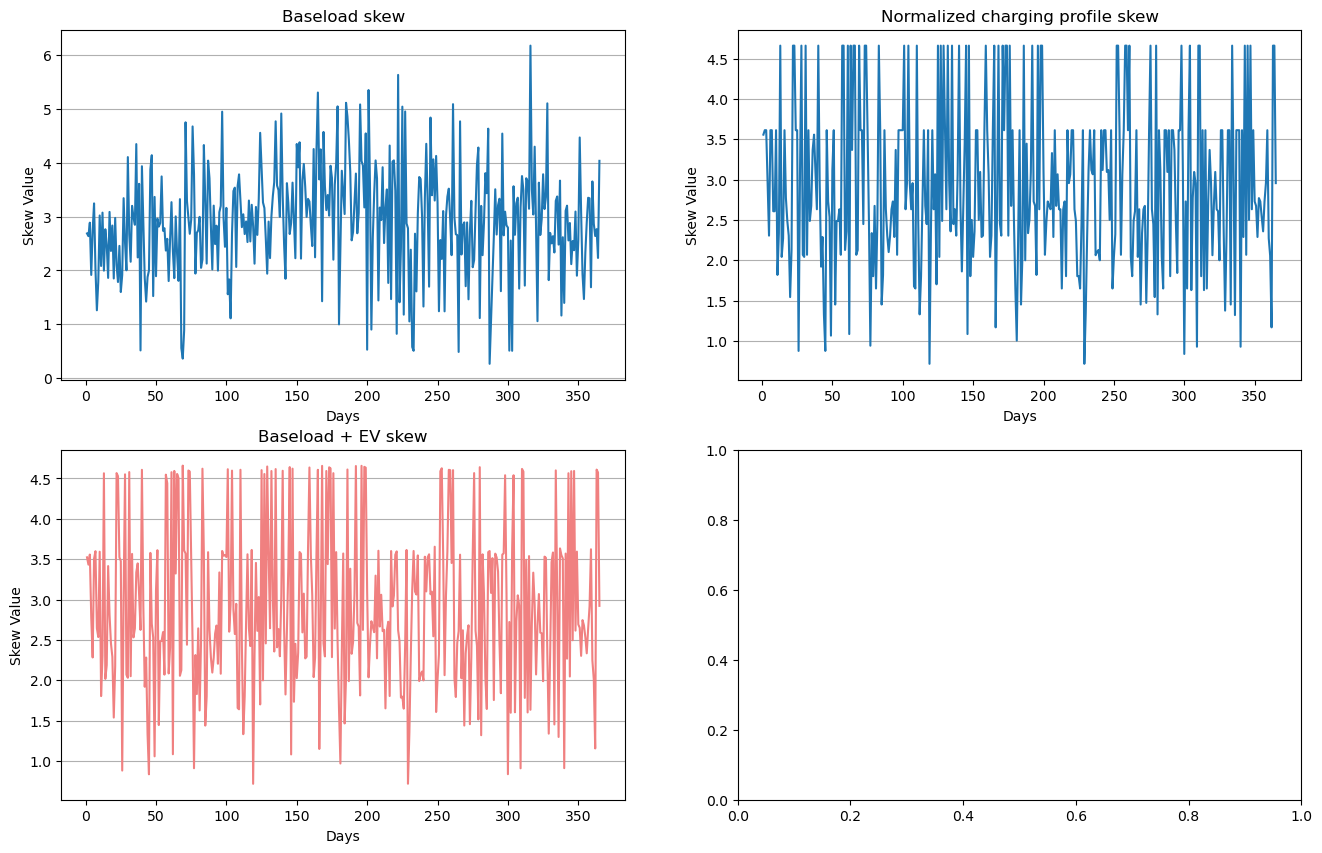

In [8]:
chargingprofile_skew_year = chargingprofile.skew(axis=0)
baseload_skew_year = baseload.skew(axis=0)
baseandEV_skew_year = base_and_EV.skew(axis=0)

fig, axs = plt.subplots(2, 2, figsize=(16, 10))  # 2 row, 2 columns
axs[0,0].plot(baseload_skew_year.index, baseload_skew_year)
axs[0,0].set_title('Baseload skew')
axs[0,0].set_xlabel('Days')
axs[0,0].set_ylabel('Skew Value')
axs[0,0].grid(axis='y')

axs[0,1].plot(chargingprofile_skew_year.index, chargingprofile_skew_year)
axs[0,1].set_title('Normalized charging profile skew')
axs[0,1].set_xlabel('Days')
axs[0,1].set_ylabel('Skew Value')
axs[0,1].grid(axis='y')

axs[1,0].plot(baseandEV_skew_year.index, baseandEV_skew_year, color='lightcoral')
axs[1,0].set_title('Baseload + EV skew')
axs[1,0].set_xlabel('Days')
axs[1,0].set_ylabel('Skew Value')
axs[1,0].grid(axis='y')

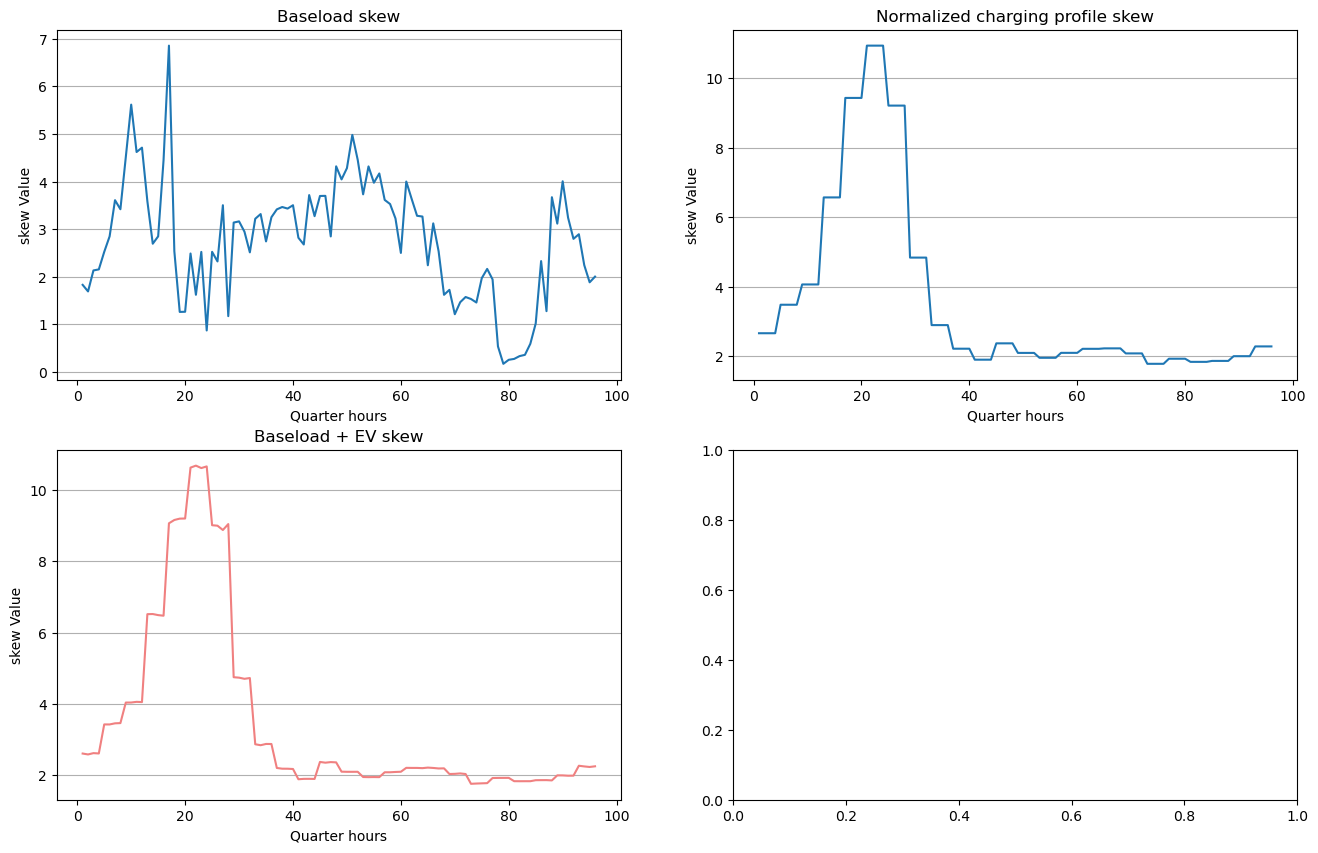

In [9]:
baseload_skew_day = baseload.skew(axis=1)
chargingprofile_skew_day = chargingprofile.skew(axis=1)
baseandEV_skew_day = base_and_EV.skew(axis=1)

fig, axs = plt.subplots(2, 2, figsize=(16, 10))  # 2 row, 2 columns
axs[0,0].plot(baseload_skew_day.index, baseload_skew_day)
axs[0,0].set_title('Baseload skew')
axs[0,0].set_xlabel('Quarter hours')
axs[0,0].set_ylabel('skew Value')
axs[0,0].grid(axis='y')

axs[0,1].plot(chargingprofile_skew_day.index, chargingprofile_skew_day)
axs[0,1].set_title('Normalized charging profile skew')
axs[0,1].set_xlabel('Quarter hours')
axs[0,1].set_ylabel('skew Value')
axs[0,1].grid(axis='y')

axs[1,0].plot(baseandEV_skew_day.index, baseandEV_skew_day, color='lightcoral')
axs[1,0].set_title('Baseload + EV skew')
axs[1,0].set_xlabel('Quarter hours')
axs[1,0].set_ylabel('skew Value')
axs[1,0].grid(axis='y')

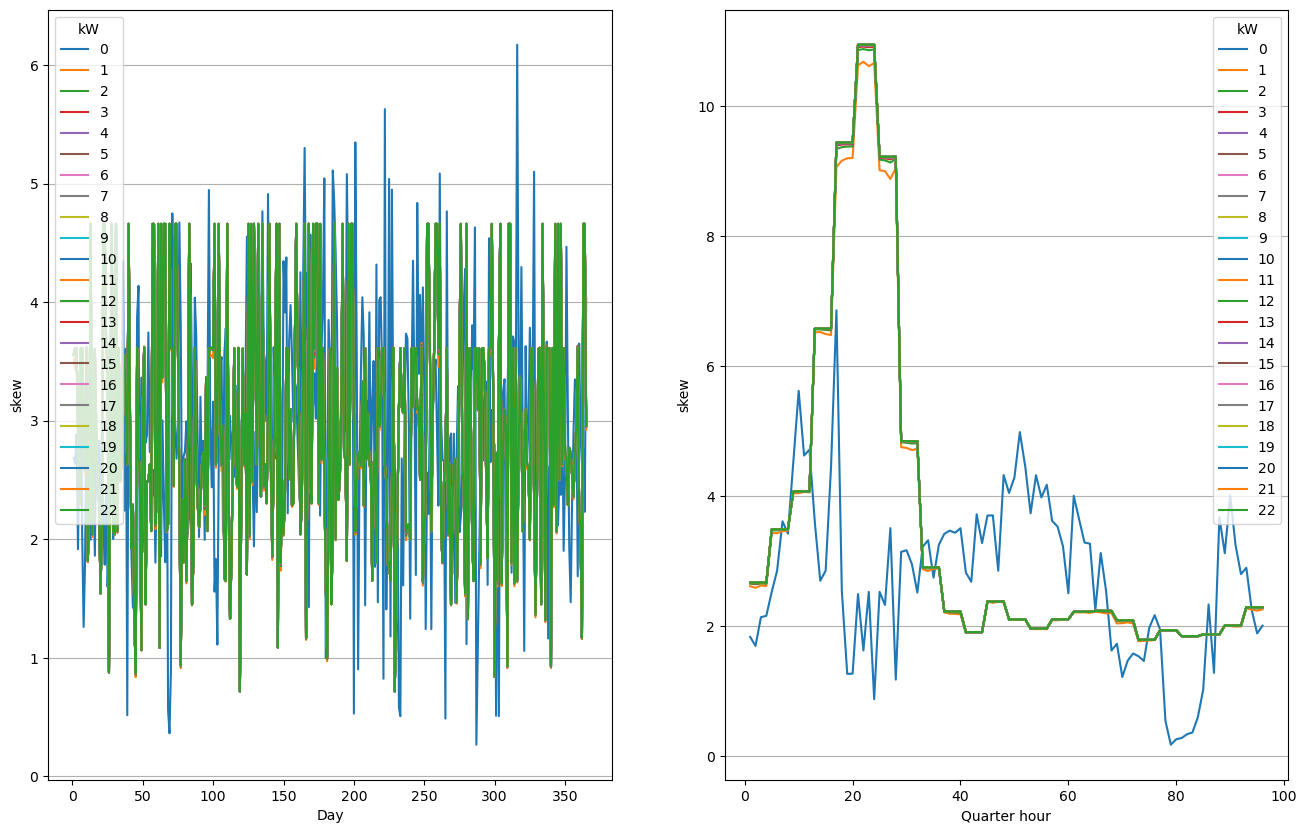

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [10]:
kw_values = np.arange(0, 23, 1) 
results_year = pd.DataFrame()
results_day = pd.DataFrame()

# Calculate the net consumption and skew for each kWp value
for kw in kw_values: 
    net_consumption = baseload + (kw * chargingprofile)

    net_consumption_year_skew = net_consumption.skew(axis=0)
    net_consumption_day_skew = net_consumption.skew(axis=1)
    
    results_year[len(results_year.columns)] = net_consumption_year_skew
    results_day[len(results_day.columns)] = net_consumption_day_skew

fig, axs = plt.subplots(1, 2, figsize=(16, 10))
plt.figure(figsize=(10, 6))
for kw in results_year.columns:
    axs[0].plot(results_year.index, results_year[kw], label=kw)
axs[0].set_xlabel('Day')
axs[0].set_ylabel('skew')
axs[0].legend(title='kW')
axs[0].grid(axis='y')

plt.figure(figsize=(10, 6))
for kw in results_day.columns:
    axs[1].plot(results_day.index, results_day[kw], label=kw)
axs[1].set_xlabel('Quarter hour')
axs[1].set_ylabel('skew')
axs[1].legend(title='kW') 
axs[1].grid(axis='y')

plt.show()

Statistical moment 4: Kurtosis

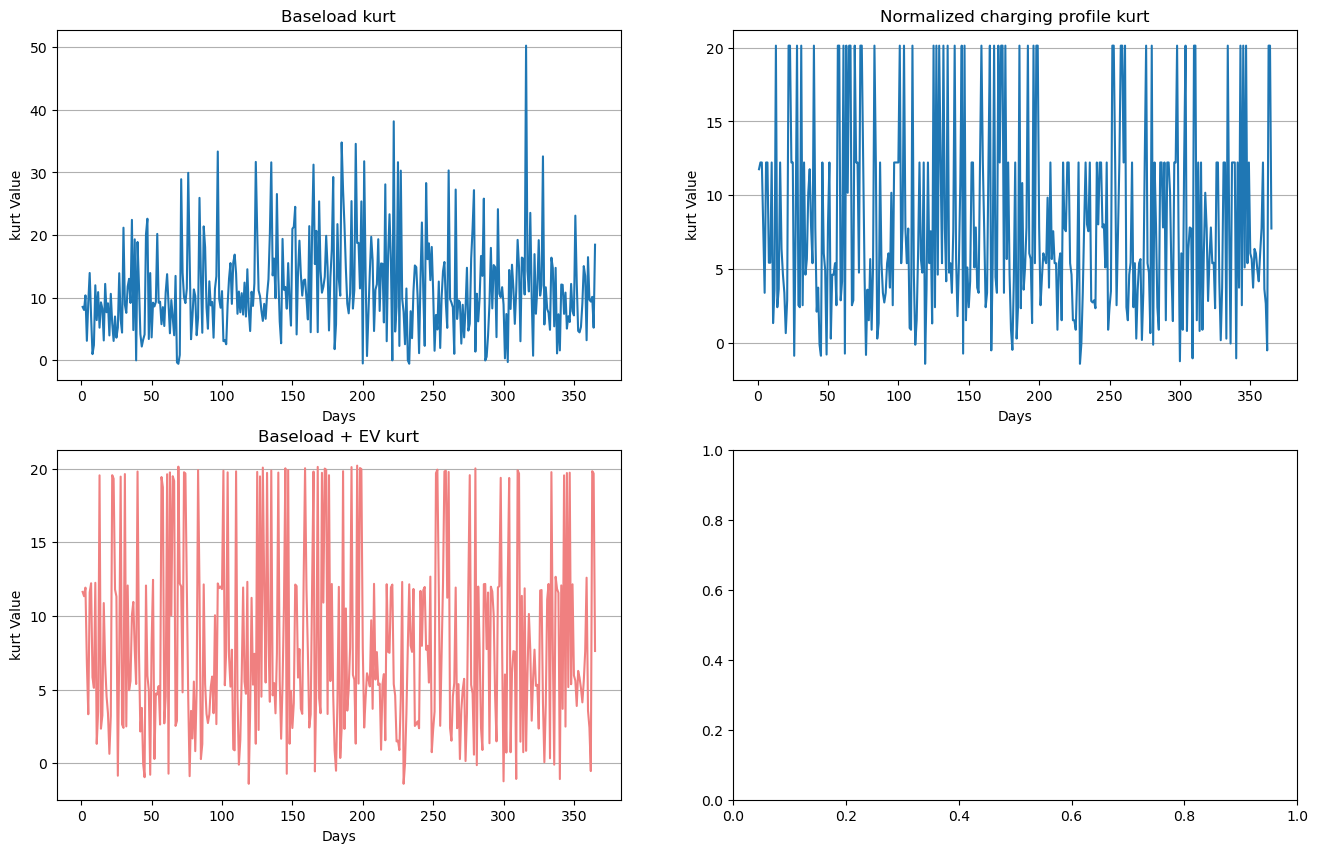

In [11]:
chargingprofile_kurt_year = chargingprofile.kurt(axis=0)
baseload_kurt_year = baseload.kurt(axis=0)
baseandEV_kurt_year = base_and_EV.kurt(axis=0)

fig, axs = plt.subplots(2, 2, figsize=(16, 10))  # 2 row, 2 columns
axs[0,0].plot(baseload_kurt_year.index, baseload_kurt_year)
axs[0,0].set_title('Baseload kurt')
axs[0,0].set_xlabel('Days')
axs[0,0].set_ylabel('kurt Value')
axs[0,0].grid(axis='y')

axs[0,1].plot(chargingprofile_kurt_year.index, chargingprofile_kurt_year)
axs[0,1].set_title('Normalized charging profile kurt')
axs[0,1].set_xlabel('Days')
axs[0,1].set_ylabel('kurt Value')
axs[0,1].grid(axis='y')

axs[1,0].plot(baseandEV_kurt_year.index, baseandEV_kurt_year, color='lightcoral')
axs[1,0].set_title('Baseload + EV kurt')
axs[1,0].set_xlabel('Days')
axs[1,0].set_ylabel('kurt Value')
axs[1,0].grid(axis='y')

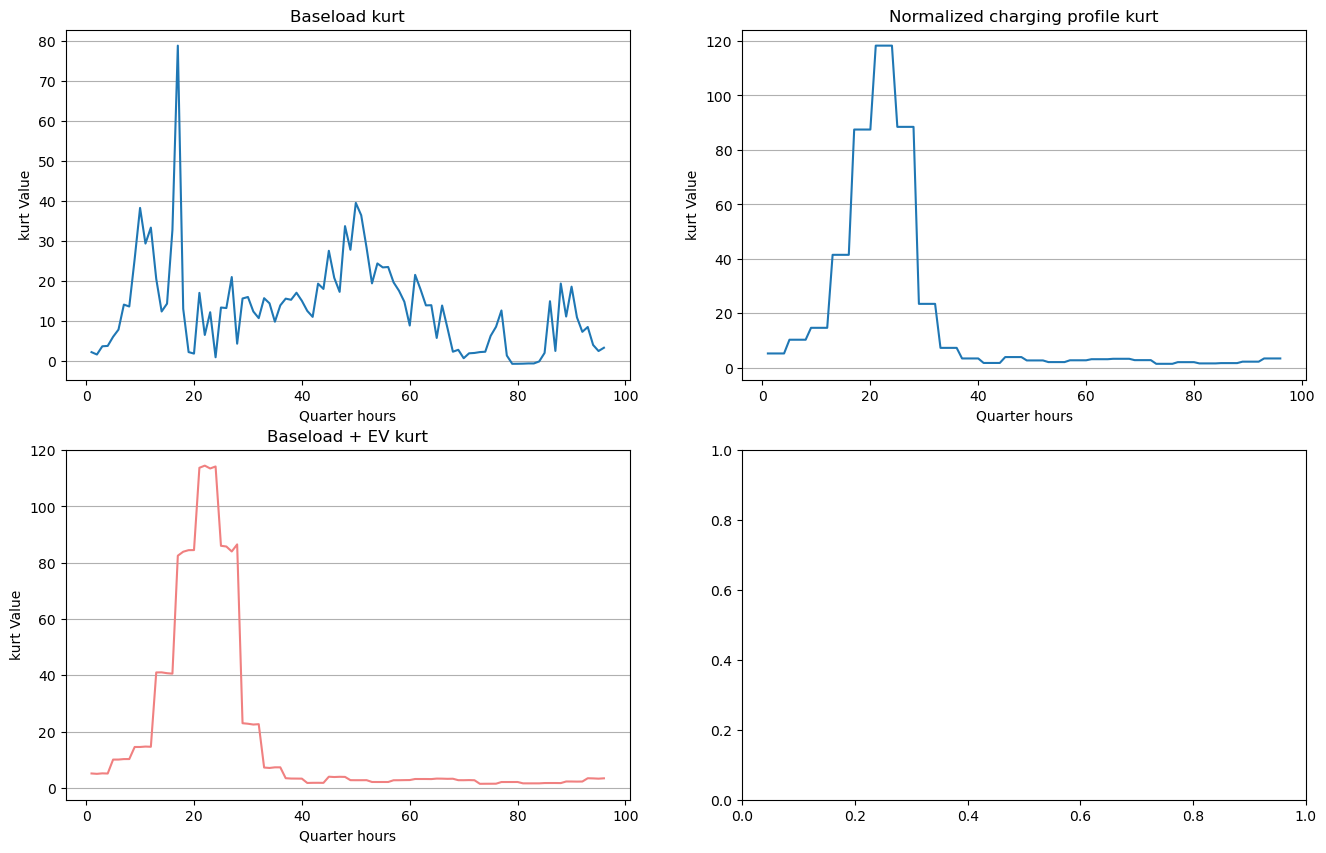

In [12]:
baseload_kurt_day = baseload.kurt(axis=1)
chargingprofile_kurt_day = chargingprofile.kurt(axis=1)
baseandEV_kurt_day = base_and_EV.kurt(axis=1)

fig, axs = plt.subplots(2, 2, figsize=(16, 10))  # 2 row, 2 columns
axs[0,0].plot(baseload_kurt_day.index, baseload_kurt_day)
axs[0,0].set_title('Baseload kurt')
axs[0,0].set_xlabel('Quarter hours')
axs[0,0].set_ylabel('kurt Value')
axs[0,0].grid(axis='y')

axs[0,1].plot(chargingprofile_kurt_day.index, chargingprofile_kurt_day)
axs[0,1].set_title('Normalized charging profile kurt')
axs[0,1].set_xlabel('Quarter hours')
axs[0,1].set_ylabel('kurt Value')
axs[0,1].grid(axis='y')

axs[1,0].plot(baseandEV_kurt_day.index, baseandEV_kurt_day, color='lightcoral')
axs[1,0].set_title('Baseload + EV kurt')
axs[1,0].set_xlabel('Quarter hours')
axs[1,0].set_ylabel('kurt Value')
axs[1,0].grid(axis='y')

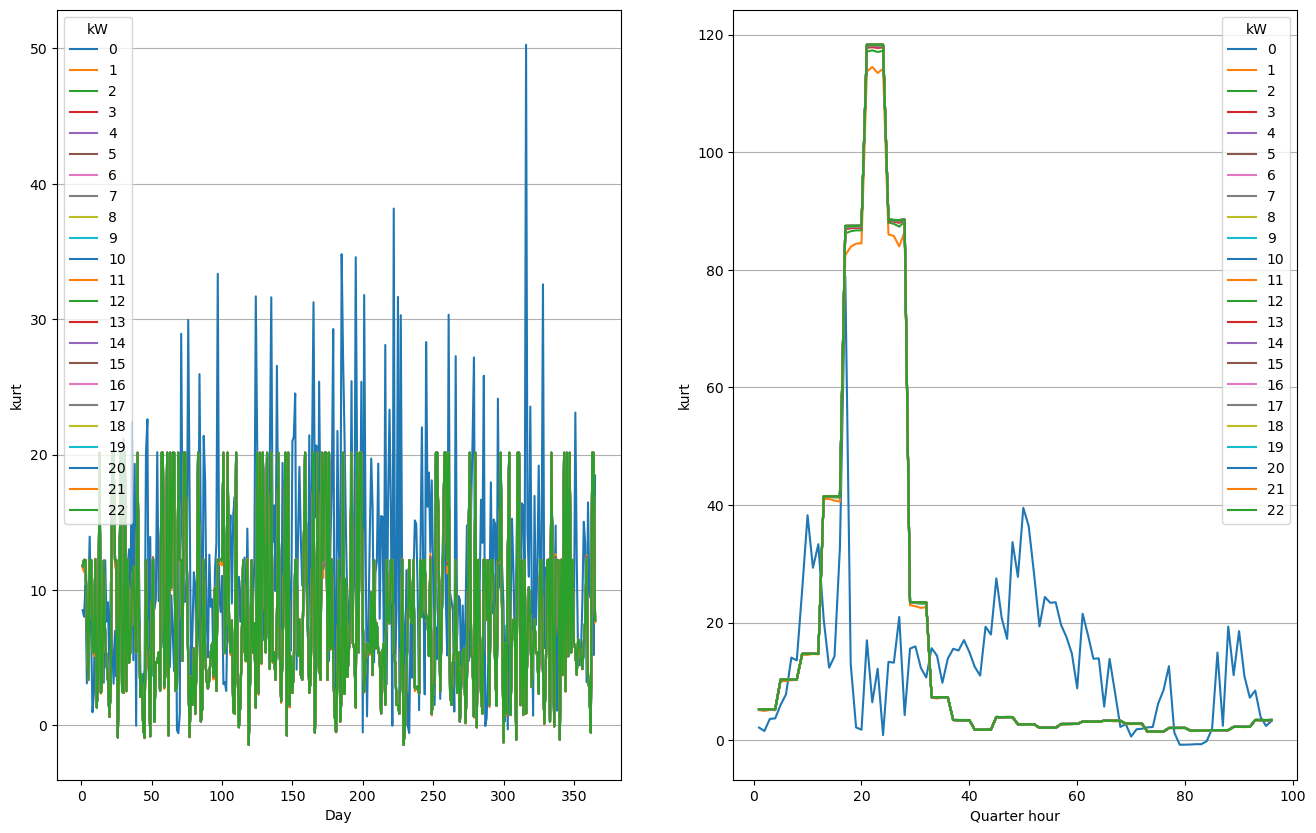

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [13]:
kw_values = np.arange(0, 23, 1) 
results_year = pd.DataFrame()
results_day = pd.DataFrame()

# Calculate the net consumption and kurt for each kWp value
for kw in kw_values: 
    net_consumption = baseload + (kw * chargingprofile)

    net_consumption_year_kurt = net_consumption.kurt(axis=0)
    net_consumption_day_kurt = net_consumption.kurt(axis=1)
    
    results_year[len(results_year.columns)] = net_consumption_year_kurt
    results_day[len(results_day.columns)] = net_consumption_day_kurt

fig, axs = plt.subplots(1, 2, figsize=(16, 10))
plt.figure(figsize=(10, 6))
for kw in results_year.columns:
    axs[0].plot(results_year.index, results_year[kw], label=kw)
axs[0].set_xlabel('Day')
axs[0].set_ylabel('kurt')
axs[0].legend(title='kW')
axs[0].grid(axis='y')

plt.figure(figsize=(10, 6))
for kw in results_day.columns:
    axs[1].plot(results_day.index, results_day[kw], label=kw)
axs[1].set_xlabel('Quarter hour')
axs[1].set_ylabel('kurt')
axs[1].legend(title='kW') 
axs[1].grid(axis='y')

plt.show()